Muhammad Hadi 

# Employee resignation prediction model               

### The purpose of this study is to creat classification models to predict emoloyee resignation, using classification algorithims. Each algorithm is then compared for its performance. Data is used from kaggle and 'Left' is the independent variable.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hr_data = pd.read_csv('HR.csv')

# Analyze data quality, Exploratory analysis and cleaning

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### at a glance it seems there are not much outliers

In [5]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### there are no missing data as well

In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### department and salary features are objects which would need to be converted to numerical values

In [7]:
# converting Department and salary values to numerical

hr_data_converted = hr_data.copy()
hr_data_converted = pd.get_dummies(hr_data_converted, columns=['Department', 'salary'])
hr_data_converted.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,...,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,...,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
hr_data['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

### Target values are imbalanced only 23% people left

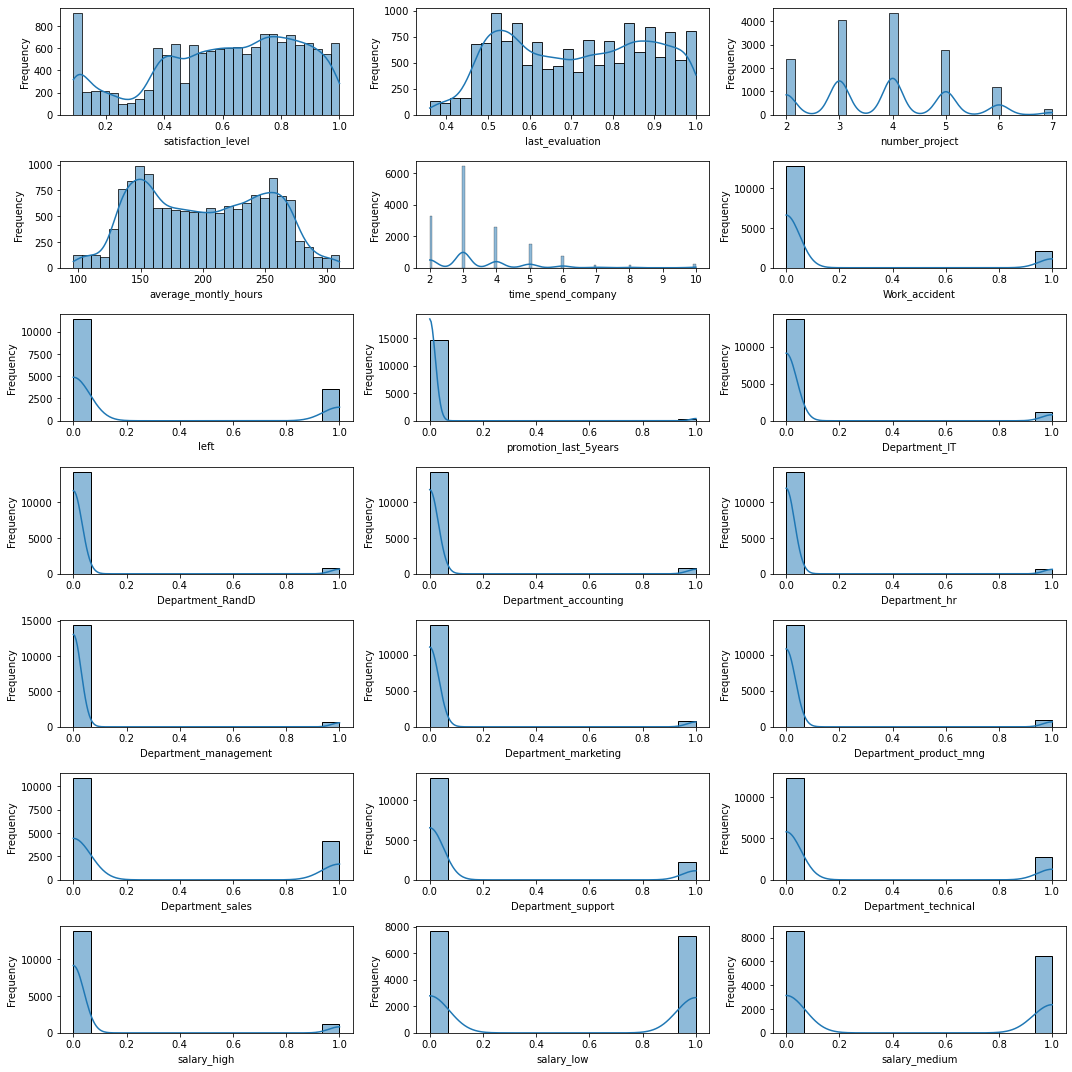

In [9]:
# analyzing data for outliers using histogams

fig, axes = plt.subplots(7,3, figsize=(15, 15))
axes = axes.flatten()

# Create histograms and distribution curves
for i, column in enumerate(hr_data_converted.columns):
    sns.histplot(hr_data_converted[column], ax=axes[i], kde=True)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### data ditribution looks fine there are minimum outliers 

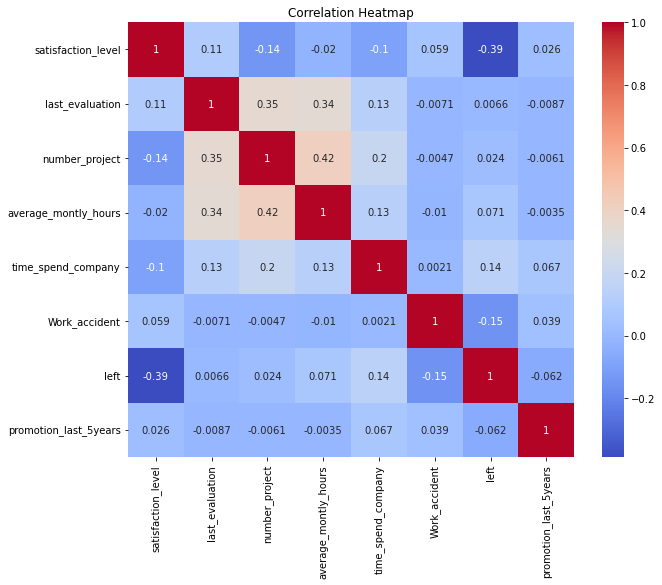

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = hr_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()


##### we can observe that evaluation have very low correlation and negligable effect on resignation which is astonishing

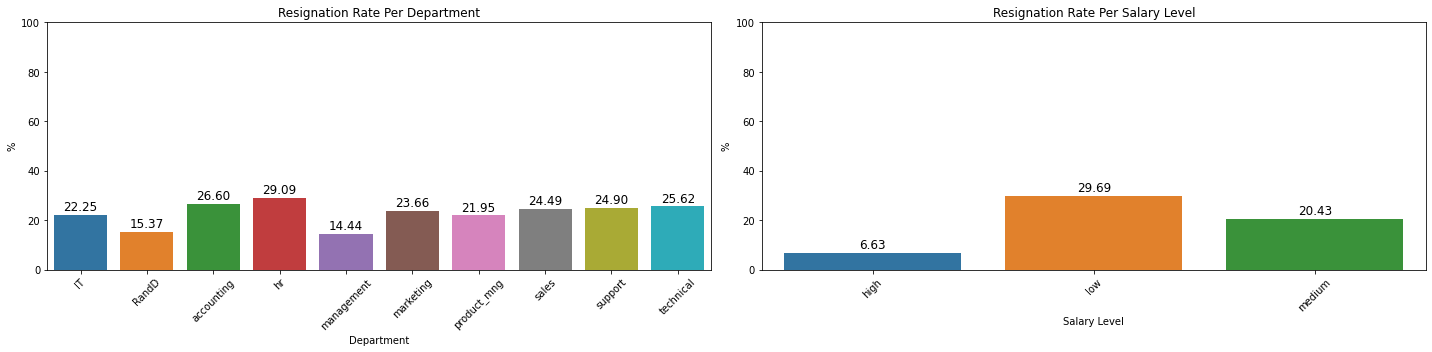

In [11]:
department_resignation_rates = hr_data.groupby('Department')['left'].mean() * 100

# Calculate resignation rates per salary level
salary_resignation_rates = hr_data.groupby('salary')['left'].mean() * 100

# Set up the figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

# Plot resignation rates per department
sns.barplot(x=department_resignation_rates.index, y=department_resignation_rates.values, ax=axes[0])
axes[0].set_title('Resignation Rate Per Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('%')
axes[0].set_ylim(0, 100)
axes[0].tick_params(axis='x', rotation=45)
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points')

# Plot resignation rates per salary level
sns.barplot(x=salary_resignation_rates.index, y=salary_resignation_rates.values, ax=axes[1])
axes[1].set_title('Resignation Rate Per Salary Level')
axes[1].set_xlabel('Salary Level')
axes[1].set_ylabel('%')
axes[1].set_ylim(0, 100)
axes[1].tick_params(axis='x', rotation=45)
for bar in axes[1].patches:
    axes[1].annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


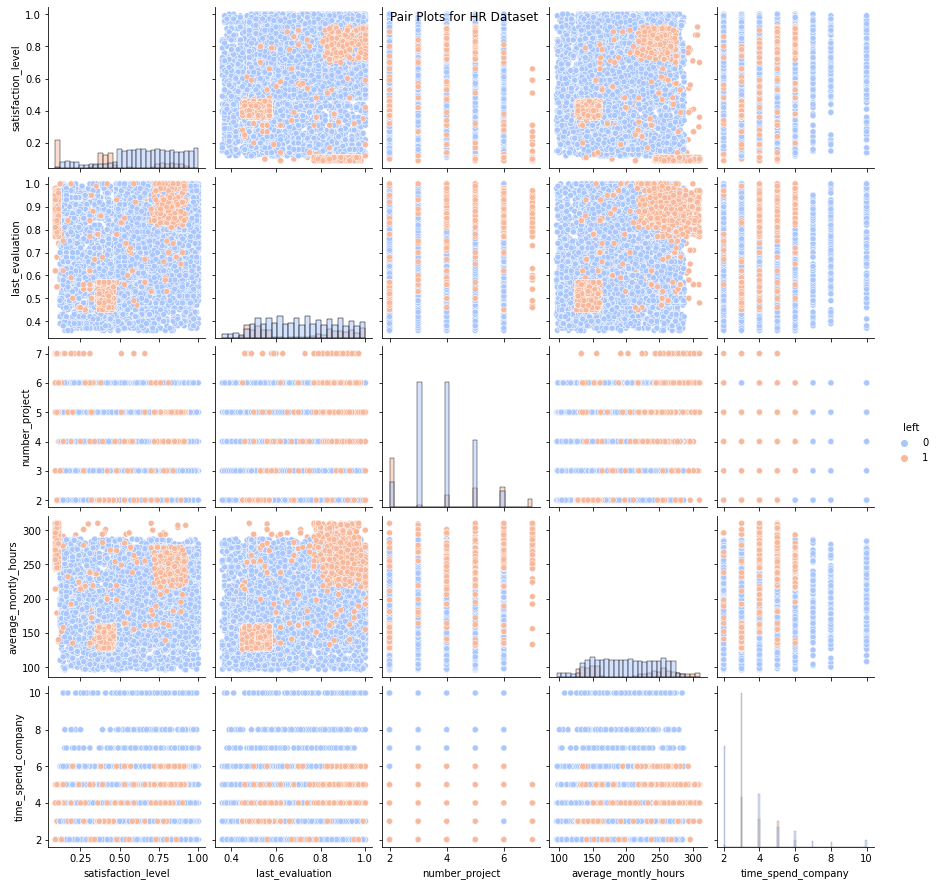

In [12]:
# Select the columns to include in the pair plot
columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'left']

# Subset the data with selected columns
subset_data = hr_data[columns]

# Create pair plots
sns.pairplot(subset_data, hue='left', diag_kind='hist', palette='coolwarm')

# Add a title
plt.suptitle('Pair Plots for HR Dataset')

# Display the plot
plt.show()

# Prediction analysis
### I will use the following model
### 1, Logistic regression
### 2, Decision Tree
### 3, Naive Bayes

In [13]:
from sklearn.model_selection import train_test_split

# Separate the dependent variable (employee_satisfaction) from the other features
X = hr_data_converted.drop('left', axis=1)
y = hr_data_converted['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1 , Logistic Regression

Accuracy: 0.786
Precision: 0.5872
Recall: 0.3423507462686567
F1 Score: 0.43252799057159697
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



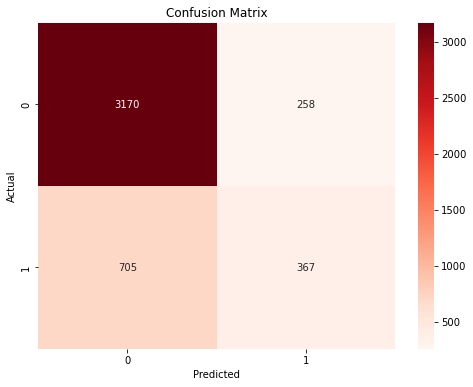

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create a scaler object
scaler = StandardScaler()

# Scale the independent variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model with scaled data
Log_model = LogisticRegression()
Log_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = Log_model.predict(X_test_scaled)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm_logistic = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### As per the evaluation parameters this is not a very good model to predict "1" 'Left class'. Looking at the classification report, you can see the precision, recall, and F1 score for both the "0" (not left) and "1" (left) classes. The precision, recall, and F1 score for class "0" are higher than those for class "1", indicating that the model performs better in predicting the samples that did not leave the company.

# 2, Decision trees

Accuracy: 0.9757777777777777
Precision: 0.9397260273972603
Recall: 0.9598880597014925
F1 Score: 0.9497000461467466
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.96      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



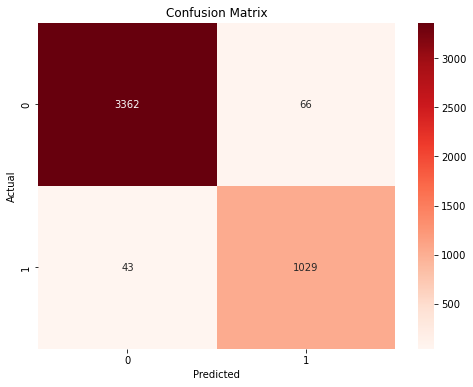

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix

cm_tree = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### The decision tree classifier achieved an accuracy of approximately 97.5% in predicting whether employees would leave or not. It demonstrated high precision (93.7% for not leaving, 94% for leaving) and recall (95.9% for not leaving, 96% for leaving) values, indicating its ability to correctly identify both classes. The F1 score, a balance between precision and recall, was approximately 0.98 for not leaving and 0.95 for leaving. The model performed well overall, as indicated by the high accuracy and balanced evaluation metrics. 

# 3.  Naive Bayes

Accuracy: 0.6502222222222223
Precision: 0.391153512575889
Recall: 0.8414179104477612
F1 Score: 0.5340438129070456
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      3428
           1       0.39      0.84      0.53      1072

    accuracy                           0.65      4500
   macro avg       0.66      0.72      0.63      4500
weighted avg       0.80      0.65      0.68      4500



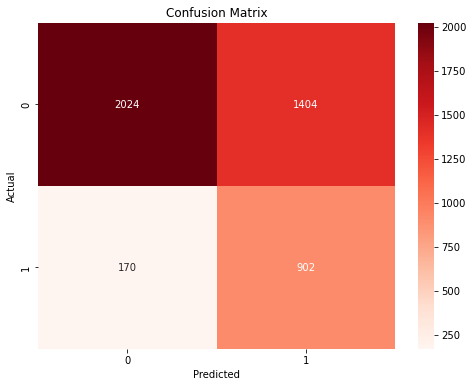

In [16]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the classifier to the training data
naive_bayes.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = naive_bayes.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm_naive = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### The Naive Bayes model achieved an accuracy of 65.02%. It had a precision of 39.12% for class 1 (employees who left), indicating that only 39.12% of the predicted class 1 samples were true positives. The recall for class 1 was 84.14%, meaning that the model correctly identified 84.14% of the actual class 1 samples. The F1 score, which balances precision and recall, was 53.40%. Overall, the model's performance was moderate with room for improvement.

# Conclusion

### Result summary

In [17]:
import pandas as pd

# Create a dictionary of model results
results = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Naive Bayes'],
    'Accuracy': [0.786, 0.975, 0.650],
    'Precision': [0.5872, 0.9372, 0.3912],
    'Recall': [0.3424, 0.9599, 0.8414],
    'F1 Score': [0.4325, 0.9484, 0.5340]
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)



                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.786     0.5872  0.3424    0.4325
1       Decision Trees     0.975     0.9372  0.9599    0.9484
2          Naive Bayes     0.650     0.3912  0.8414    0.5340


### The decision tree model performed the best among the three models, achieving high accuracy, precision, recall, and F1 score. Logistic regression showed moderate performance, while Naive Bayes had lower precision but higher recall. In terms of overall performance, the decision tree model outperformed both logistic regression and Naive Bayes.

In [18]:
# Assuming your decision tree model is named 'model'
importance = tree_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances in descending order
print(feature_importances)

                   Feature  Importance
0       satisfaction_level    0.493872
1          last_evaluation    0.153350
4       time_spend_company    0.139019
2           number_project    0.100440
3     average_montly_hours    0.090756
18              salary_low    0.003850
15      Department_support    0.003231
16    Department_technical    0.003121
17             salary_high    0.002185
7            Department_IT    0.002008
9    Department_accounting    0.001968
14        Department_sales    0.001164
19           salary_medium    0.001105
13  Department_product_mng    0.001087
8         Department_RandD    0.000967
5            Work_accident    0.000781
11   Department_management    0.000448
10           Department_hr    0.000403
12    Department_marketing    0.000229
6    promotion_last_5years    0.000018


#### based on the decision tree model satisfaction level has the highest impact while promotion has the lowest impact on employee resignation